**<h1>1.Final Merged Sales Data**

In [ ]:
# Import necessary libraries
import pandas as pd

# Load Excel file
file_path = '/content/Sales Data.xlsx'
excel_file = pd.ExcelFile(file_path)

# Load and Display Sales Data (Before Cleaning)
sales_data = pd.read_excel(file_path, sheet_name='Sales')
print("Sales Data (Before Cleaning):\n")
print(sales_data.head())

# Load and Display Distribution Data (Before Cleaning)
distribution_data = pd.read_excel(file_path, sheet_name='Distribution')
print("\nDistribution Data (Before Cleaning):\n")
print(distribution_data.head())

# Load and Display Shipment Data (Before Cleaning)
shipment_data = pd.read_excel(file_path, sheet_name='Shipment')
print("\nShipment Data (Before Cleaning):\n")
print(shipment_data.head())

# Clean Sales Data
sales_data_cleaned = sales_data.iloc[1:].reset_index(drop=True)
sales_data_cleaned.columns = [
    'Period', 'Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2', 'Sales_Value_V3',
    'Unused', 'Volume_Brand', 'V1_Volume', 'V2_Volume', 'V3_Volume', 'Unused_2',
    'Avg_Price_per_SU', 'V1_Avg_Price', 'V2_Avg_Price', 'V3_Avg_Price',
    'Unused_3', 'Avg_Price_per_USD', 'V1_USD', 'V2_USD', 'V3_USD'
]
sales_data_cleaned['Period'] = pd.to_datetime(sales_data_cleaned['Period'], errors='coerce')
sales_data_cleaned = sales_data_cleaned.drop(columns=['Unused', 'Unused_2', 'Unused_3'])
print("\nSales Data (After Cleaning):\n")
print(sales_data_cleaned.head().to_string(index=False))

# Clean Distribution Data
distribution_data_cleaned = distribution_data.iloc[1:].reset_index(drop=True)
distribution_data_cleaned.columns = [
    'Period', 'WTD_Brand', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'Unused',
    'NUMD_Brand', 'V1_NUMD', 'V2_NUMD', 'V3_NUMD'
]
distribution_data_cleaned['Period'] = pd.to_datetime(distribution_data_cleaned['Period'], errors='coerce')
distribution_data_cleaned = distribution_data_cleaned.drop(columns=['Unused'])
print("\nDistribution Data (After Cleaning):\n")
print(distribution_data_cleaned.head().to_string(index=False))

# Clean Shipment Data
shipment_data_cleaned = shipment_data.iloc[1:].reset_index(drop=True)
shipment_data_cleaned.columns = [
    'Period', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment', 'V3_Shipment',
    'Unused', 'Volume_Brand', 'V1_Volume', 'V2_Volume', 'V3_Volume'
]
shipment_data_cleaned['Period'] = pd.to_datetime(shipment_data_cleaned['Period'], errors='coerce')
shipment_data_cleaned = shipment_data_cleaned.drop(columns=['Unused', 'Volume_Brand', 'V1_Volume', 'V2_Volume', 'V3_Volume'])
print("\nShipment Data (After Cleaning):\n")
print(shipment_data_cleaned.head().to_string(index=False))

# Merge Cleaned Data
sales_merged_data = (
    sales_data_cleaned
    .merge(distribution_data_cleaned, on='Period', how='left')
    .merge(shipment_data_cleaned, on='Period', how='left')
)

# Display Merged Data Shape and First Few Rows
print("\nMerged Data Shape:", sales_merged_data.shape)
print(sales_merged_data.head().to_string(index=False))


Sales Data (Before Cleaning):

            Unnamed: 0 Value ('000 HKD) Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0               Period            Brand         V1         V2         V3   
1  2011-07-01 00:00:00          28518.3    12706.5    12196.9     3614.4   
2  2011-08-01 00:00:00          31712.5    14190.5    13250.5     4271.6   
3  2011-09-01 00:00:00          28436.8    12422.5    11946.7     4067.6   
4  2011-10-01 00:00:00          29048.8    12652.5    12690.9     3705.5   

   Unnamed: 5 Volume (SU) Unnamed: 7 Unnamed: 8 Unnamed: 9  Unnamed: 10  \
0         NaN       Brand         V1         V2         V3          NaN   
1         NaN     85935.6    36127.4    40971.6     8835.6          NaN   
2         NaN     95135.2    40373.7    44402.1    10359.4          NaN   
3         NaN       85814    36034.5    40029.2     9750.3          NaN   
4         NaN     88047.7    36697.8    42431.3     8918.6          NaN   

  Avg Price per SU Unnamed: 12 Unnamed: 13 Unnamed: 14  Unnam

**<h1>2.Final Merged Media Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# File path
file_path = '/content/Media_Data.xlsx'
media_data = pd.ExcelFile(file_path)

# Function to load raw data with multi-level headers
def load_raw_data(sheet_name):
    df = pd.read_excel(media_data, sheet_name=sheet_name, header=[0, 1, 2, 3])
    return df

# Load and display raw data for each sheet
print("Brand Data (Raw):")
brand_df_raw = load_raw_data('Brand')
print(brand_df_raw.head())

print("\nV1 Data (Raw):")
V1_df_raw = load_raw_data('V1')
print(V1_df_raw.head())

print("\nV2 Data (Raw):")
V2_df_raw = load_raw_data('V2')
print(V2_df_raw.head())

print("\nV3 Data (Raw):")
V3_df_raw = load_raw_data('V3')
print(V3_df_raw.head())

# Function to clean and filter data by date range and missing value thresholds, with detailed column names
def clean_and_filter_data(sheet_name, media_data, date_column_tuple, prefix, start_date='2011-07-01', end_date='2014-06-30'):
    # Load raw data with multi-level header
    df_raw = pd.read_excel(media_data, sheet_name=sheet_name, header=[0, 1, 2, 3])

    # Replace zeros with NaN to handle missing values for threshold calculation
    df_raw.replace(0, np.nan, inplace=True)

    # Convert specified date column to date format
    df_raw[date_column_tuple] = pd.to_datetime(df_raw[date_column_tuple], errors='coerce').dt.date

    # Filter rows within the date range
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    filtered_df = df_raw[(df_raw[date_column_tuple] >= start_date) & (df_raw[date_column_tuple] <= end_date)]

    # Drop columns with all NaN values and columns with <= 60% non-NaN values
    df_cleaned = filtered_df.dropna(axis=1, how='all')
    threshold = 0.6 * len(df_cleaned)
    df_cleaned = df_cleaned.dropna(thresh=int(threshold), axis=1)

    # Flatten multi-level column names into detailed names and add prefix
    df_cleaned.columns = [f"{prefix}_" + '_'.join(filter(None, map(str, col))).strip() for col in df_cleaned.columns]

    # Rename the first column as 'Period'
    df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[0]: 'Period'})

    return df_cleaned

# Clean and display cleaned data for each sheet with detailed column names
brand_df_cleaned = clean_and_filter_data('Brand', media_data, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'), 'Brand')
print("\nBrand Data (Cleaned with Detailed Column Names):")
print(brand_df_cleaned.head())
print("Brand Data Shape:", brand_df_cleaned.shape)

V1_df_cleaned = clean_and_filter_data('V1', media_data, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'), 'V1')
print("\nV1 Data (Cleaned with Detailed Column Names):")
print(V1_df_cleaned.head())
print("V1 Data Shape:", V1_df_cleaned.shape)

V2_df_cleaned = clean_and_filter_data('V2', media_data, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'), 'V2')
print("\nV2 Data (Cleaned with Detailed Column Names):")
print(V2_df_cleaned.head())
print("V2 Data Shape:", V2_df_cleaned.shape)

V3_df_cleaned = clean_and_filter_data('V3', media_data, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'), 'V3')
print("\nV3 Data (Cleaned with Detailed Column Names):")
print(V3_df_cleaned.head())
print("V3 Data Shape:", V3_df_cleaned.shape)

# Merge cleaned DataFrames on 'Period' with detailed column names and convert 'Period' to month start date
merged_data = (
    brand_df_cleaned
    .merge(V1_df_cleaned, on='Period', how='left')
    .merge(V2_df_cleaned, on='Period', how='left')
    .merge(V3_df_cleaned, on='Period', how='left')
)

merged_data['Period'] = pd.to_datetime(merged_data['Period']).dt.to_period('M').dt.to_timestamp()

# Display merged data shape and first few rows with detailed column names
print("\nMerged Data Shape:", merged_data.shape)
print("\nMerged Data (First 5 Rows):\n")
merged_data.head()


Brand Data (Raw):
    Unnamed: 0_level_0 TV including ISP (GRPs) - F30-39               \
    Unnamed: 0_level_1          TOTAL GRPs - (ISP + TV) ISP TV Total   
                  Unit                              GRP          GRP   
        Responsibility                              AOR          AOR   
0  2010-01-01 00:00:00                              NaN          NaN   
1  2010-02-02 00:00:00                              NaN          NaN   
2  2010-03-06 00:00:00                              NaN          NaN   
3  2010-04-07 00:00:00                              NaN          NaN   
4  2010-05-09 00:00:00                              NaN          NaN   

                                                                        \
  ISP Digital Total 5 Seconder  10 Seconder  15 Seconder  20 Seconder    
                GRP         GRP          GRP          GRP          GRP   
                AOR         AOR          AOR          AOR          AOR   
0               NaN         NaN      

,Period,"Brand_Search (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital","Brand_Search (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital",Brand_Search (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR,"Brand_Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital","Brand_Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital",Brand_Birth Rate_No. of Births_ppl_CPA,Brand_Youtube Brand Channel_Side by Side Video_No of Views_P&G/Digital Agency,Brand_CRM_Pampers Baby Club_Pls add all CRM Elements_Pls add all CRM Elements_P&G,V1_TV (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR,...,V1_TV (Spends)_ISP TV Spends_USM _AOR,V1_iMedia_TOTAL (Impression & Click)_iMedia Impressions_No of impressions_Digital,V1_iMedia_TOTAL (Impression & Click)_iMedia Click _No of Clicks_Digital,V1_iMedia by Site Type (Impression & Click)_Parenting Site (BBK)_No of impressions_Digital,V1_iMedia by Site Type (Impression & Click)_Parenting Site (BBK)_No of Clicks_Digital,V1_iMedia by Site (Impression & View)_BBK _No of impressions_Digital,V1_iMedia by Site (Impression & View)_BBK _No of Clicks_Digital,V1_iMedia_TOTAL (Spend)_iMedia Spends_USM_Digital & AOR,V1_iMedia by Site Type (Spend)_Parenting Site (BBK)_USM_Digital & AOR,V1_iMedia by Site (Spend)_BBK _USM_Digital & AOR
0,2011-07-01,66442189.0,24418.0,5.037171,74109.0,172.133333,8128.0,NaN,40.458478,200.0,...,9.178440,2108173.0,2549.0,2108173.0,2549.0,2108173.0,2549.0,14.182385,14.182385,14.182385
1,2011-08-01,74218274.0,23888.0,4.619848,75408.0,76277.064516,8531.0,NaN,22.657005,100.0,...,3.856487,507787.0,357.0,507787.0,357.0,507787.0,357.0,0.703259,0.703259,0.703259
2,2011-09-01,62093623.0,22417.0,4.624386,77106.0,77099.533333,8099.0,NaN,22.240559,100.0,...,5.321952,3076266.0,2077.0,3076266.0,2077.0,3076266.0,2077.0,7.032588,7.032588,7.032588
3,2011-10-01,55363384.0,18600.0,3.597169,77227.0,77205.258065,8352.0,NaN,26.985212,91.0,...,3.856487,3250974.0,2130.0,3250974.0,2130.0,3250974.0,2130.0,10.314462,10.314462,10.314462
4,2011-11-01,58743642.0,21662.0,4.457098,77366.0,77464.533333,7816.0,NaN,41.319185,686.0,...,47.161647,867203.0,1743.0,867203.0,1743.0,867203.0,1743.0,5.127854,5.127854,5.127854


**<h1>3.Final Merged Sales_Media Data**

In [ ]:
# Merge sales and media data on 'Period' with a left join
merged_sales_media_data = sales_merged_data.merge(merged_data, on='Period', how='left')

# Check the shape to ensure it matches the expected (41, 50)
print("Merged Sales and Media Data Shape:", merged_sales_media_data.shape)

# Display the first 5 rows to verify
print("\nMerged Sales and Media Data (First 5 Rows):\n")
print(merged_sales_media_data.head().to_string(index=False))


Merged Sales and Media Data Shape: (41, 50)

Merged Sales and Media Data (First 5 Rows):

    Period Sales_Value_Brand Sales_Value_V1 Sales_Value_V2 Sales_Value_V3 Volume_Brand V1_Volume V2_Volume V3_Volume Avg_Price_per_SU V1_Avg_Price V2_Avg_Price V3_Avg_Price Avg_Price_per_USD     V1_USD     V2_USD     V3_USD WTD_Brand V1_WTD V2_WTD V3_WTD NUMD_Brand V1_NUMD V2_NUMD V3_NUMD Brand_Shipment V1_Shipment V2_Shipment V3_Shipment  Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital  Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital  Brand_Search  (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR  Brand_Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital  Brand_Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital  Brand_Birth Rate_No. of  Births_ppl_CPA Brand_Youtube Brand Channel_Side by Side Video_No of Views_P&G/Digital Agency Brand_CRM_Pampers Baby Club_Pls 

**<h1>4.Exploratory Data Analysis (EDA)**

**<h2>i) Missing Value Analysis**

In [ ]:
#Analyze Missing Values
missing_values = merged_sales_media_data.isnull().sum()
missing_percentage = (missing_values / len(merged_sales_media_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
print("Missing Value Analysis:\n", missing_data.sort_values(by='Percentage', ascending=False))


Missing Value Analysis:
                                                     Missing Values  Percentage
V1_iMedia by Site (Spend)_BBK _USM_Digital & AOR                19   46.341463
V1_iMedia_TOTAL (Impression & Click)_iMedia Imp...              19   46.341463
V1_iMedia by Site Type (Spend)_Parenting Site (...              19   46.341463
V1_iMedia_TOTAL (Spend)_iMedia Spends_USM_Digit...              19   46.341463
V1_iMedia by Site (Impression & View)_BBK _No o...              19   46.341463
V1_iMedia by Site (Impression & View)_BBK _No o...              19   46.341463
V1_iMedia by Site Type (Impression & Click)_Par...              19   46.341463
V1_iMedia by Site Type (Impression & Click)_Par...              19   46.341463
V1_iMedia_TOTAL (Impression & Click)_iMedia Cli...              19   46.341463
Brand_Youtube Brand Channel_Side by Side Video_...              17   41.463415
Brand_Birth Rate_No. of  Births_ppl_CPA                         11   26.829268
V1_TV (Spends)_TOTAL Spends

**<h2>ii) Handling Missing Values (ffill & bfill)**

In [ ]:
# Handle Missing Values
# Forward fill and backward fill to handle NaN values
merged_sales_media_data.ffill(inplace=True)
merged_sales_media_data.bfill(inplace=True)

# Confirm there are no remaining missing values
print("Missing values handled with forward fill and backward fill.")
print("Remaining missing values:\n", merged_sales_media_data.isnull().sum().sum())


Missing values handled with forward fill and backward fill.
Remaining missing values:
 0


<ipython-input-6-1cb90b54a325>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_sales_media_data.ffill(inplace=True)


**<h2>iii) Outlier Detection**

In [ ]:
# Identify numerical columns for outlier detection
numeric_columns = merged_sales_media_data.select_dtypes(include=[np.number]).columns
print("Numeric Columns for Outlier Detection:\n", numeric_columns)

Numeric Columns for Outlier Detection:
 Index(['Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2',
       'Sales_Value_V3', 'Volume_Brand', 'V1_Volume', 'V2_Volume', 'V3_Volume',
       'Avg_Price_per_SU', 'V1_Avg_Price', 'V2_Avg_Price', 'V3_Avg_Price',
       'Avg_Price_per_USD', 'V1_USD', 'V2_USD', 'V3_USD', 'WTD_Brand',
       'V1_WTD', 'V2_WTD', 'V3_WTD', 'NUMD_Brand', 'V1_NUMD', 'V2_NUMD',
       'V3_NUMD', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment',
       'V3_Shipment',
       'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital',
       'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital',
       'Brand_Search  (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR',
       'Brand_Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital',
       'Brand_Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital',
       'Brand_Birth Rate_No. of  Births_ppl_CP

In [ ]:
# Group columns by themes for more manageable visualization
sales_columns = [col for col in numeric_columns if 'Sales_Value' in col]
volume_columns = [col for col in numeric_columns if 'Volume' in col]
price_columns = [col for col in numeric_columns if 'Avg_Price' in col]

print("Sales Columns:", sales_columns)
print("Volume Columns:", volume_columns)
print("Price Columns:", price_columns)

Sales Columns: ['Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2', 'Sales_Value_V3']
Volume Columns: ['Volume_Brand', 'V1_Volume', 'V2_Volume', 'V3_Volume']
Price Columns: ['Avg_Price_per_SU', 'V1_Avg_Price', 'V2_Avg_Price', 'V3_Avg_Price', 'Avg_Price_per_USD']


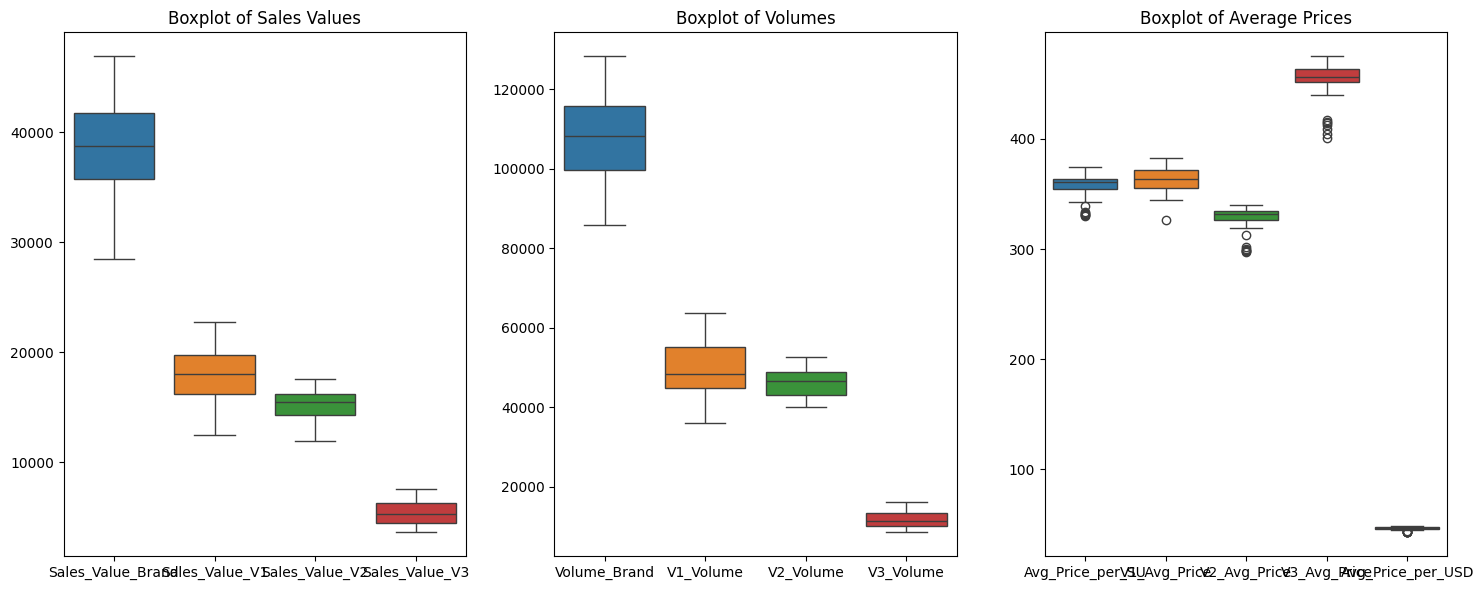

In [ ]:
# Plot boxplots for sales, volume, and price columns in groups
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Sales Value Boxplots
plt.subplot(1, 3, 1)
sns.boxplot(data=merged_sales_media_data[sales_columns])
plt.title("Boxplot of Sales Values")

# Volume Boxplots
plt.subplot(1, 3, 2)
sns.boxplot(data=merged_sales_media_data[volume_columns])
plt.title("Boxplot of Volumes")

# Price Boxplots
plt.subplot(1, 3, 3)
sns.boxplot(data=merged_sales_media_data[price_columns])
plt.title("Boxplot of Average Prices")

plt.tight_layout()
plt.show()

**<h2>iv) Descriptive Statistics**

In [ ]:
# Descriptive statistics by category
print("Sales Statistics:\n", merged_sales_media_data[sales_columns].describe())
print("\nVolume Statistics:\n", merged_sales_media_data[volume_columns].describe())
print("\nPrice Statistics:\n", merged_sales_media_data[price_columns].describe())

Sales Statistics:
        Sales_Value_Brand  Sales_Value_V1  Sales_Value_V2  Sales_Value_V3
count          41.000000       41.000000       41.000000       41.000000
mean        38379.313902    17890.832683    15149.017073     5339.454878
std          4741.210138     2649.936210     1449.530193     1090.575979
min         28436.800000    12422.500000    11946.700000     3614.400000
25%         35746.670000    16154.000000    14246.370000     4455.510000
50%         38711.490000    18054.970000    15504.090000     5247.830000
75%         41766.940000    19764.630000    16205.310000     6272.480000
max         46926.170000    22749.220000    17594.810000     7515.340000

Volume Statistics:
         Volume_Brand     V1_Volume     V2_Volume     V3_Volume
count      41.000000     41.000000     41.000000     41.000000
mean   107378.072439  49329.040732  46256.017073  11792.987561
std     11222.528686   7196.255873   3558.156471   2130.397844
min     85814.000000  36034.500000  40029.200000   

**<h2>v) Time Series Visualization of Sales Data**


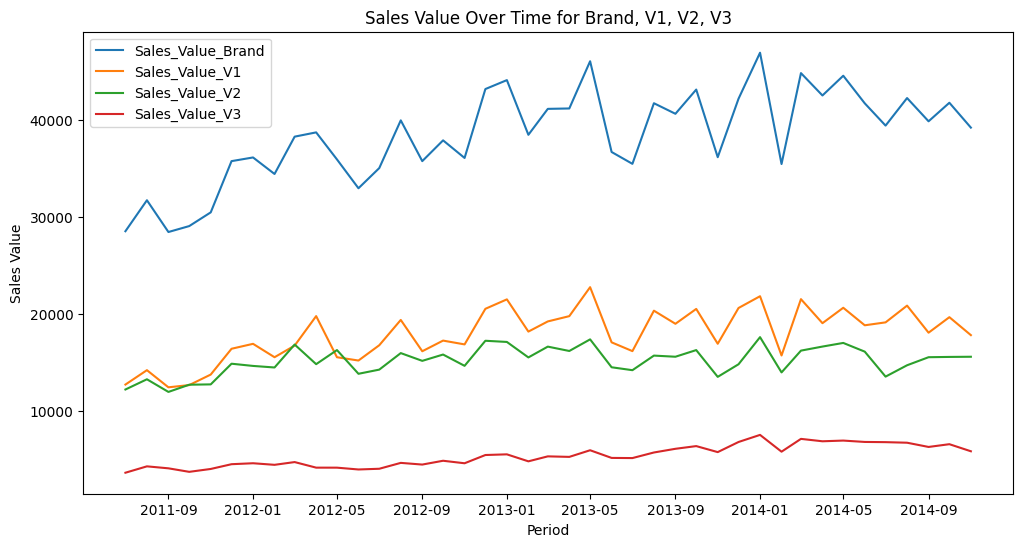

In [ ]:
# Line plot for sales values (Sales_Value_Brand, Sales_Value_V1, Sales_Value_V2, Sales_Value_V3) over time
plt.figure(figsize=(12, 6))
for col in sales_columns:
    plt.plot(merged_sales_media_data['Period'], merged_sales_media_data[col], label=col)

plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.title('Sales Value Over Time for Brand, V1, V2, V3')
plt.legend()
plt.show()

**<h2>vi) Combined Media and Sales Data Spending Visualization**


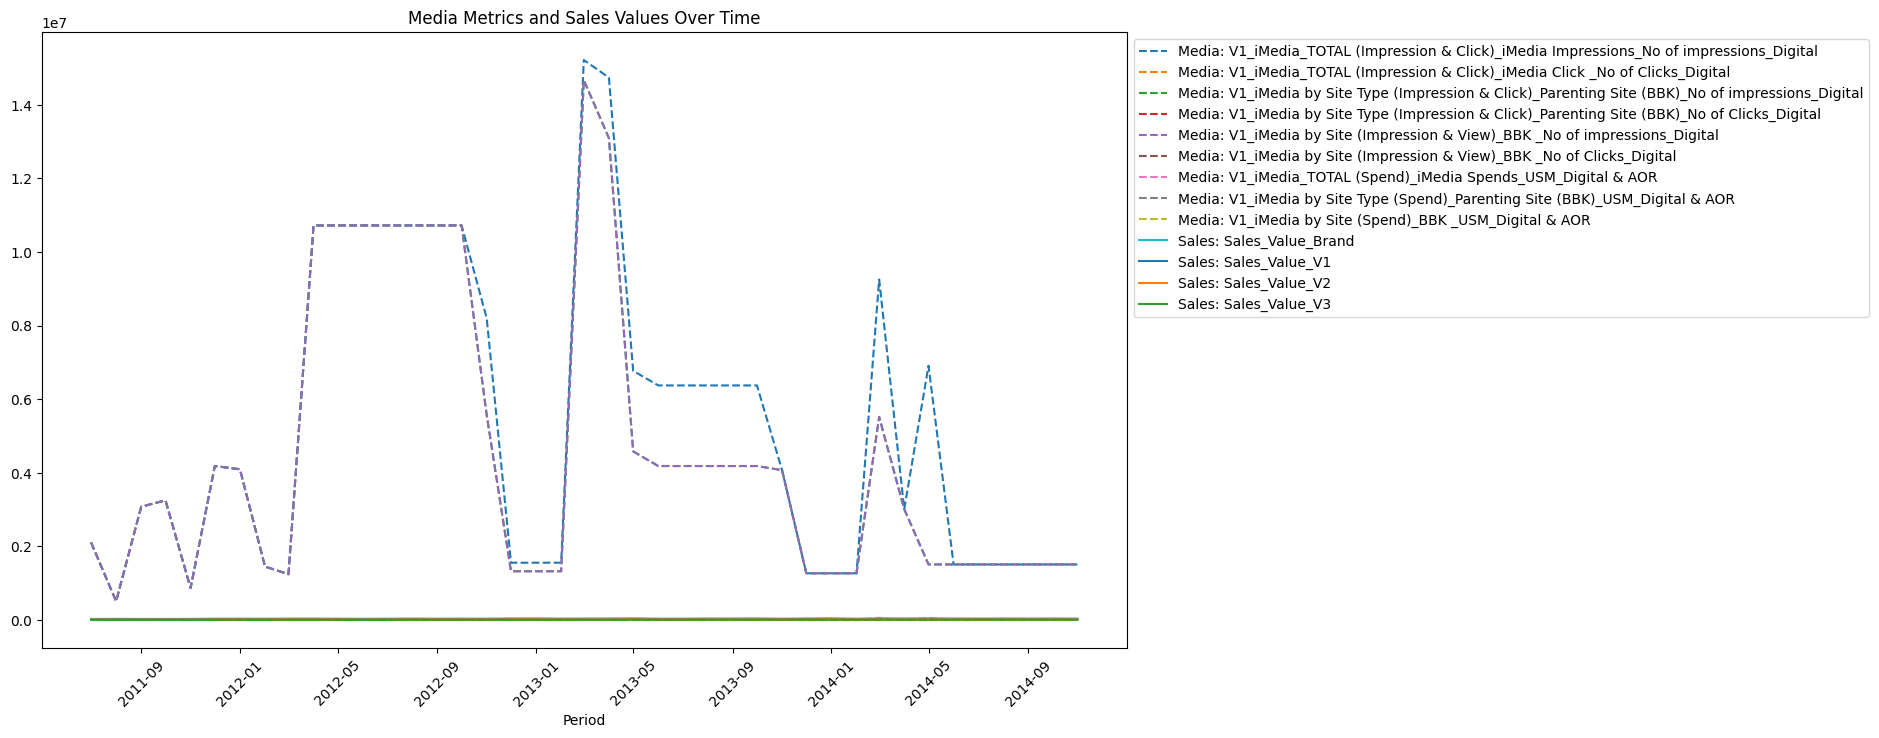

In [ ]:
# Define media and sales columns
media_columns = [col for col in merged_sales_media_data.columns if 'Media' in col]
sales_columns = ['Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2', 'Sales_Value_V3']

plt.figure(figsize=(14, 8))

# Plot media metrics over time
for col in media_columns:
    plt.plot(merged_sales_media_data['Period'], merged_sales_media_data[col], label=f'Media: {col}', linestyle='--')

# Plot sales metrics over time with secondary y-axis
for col in sales_columns:
    plt.plot(merged_sales_media_data['Period'], merged_sales_media_data[col], label=f'Sales: {col}')

plt.xlabel('Period')
plt.title('Media Metrics and Sales Values Over Time')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.xticks(rotation=45)

# Show the combined plot
plt.show()

**<h2>vii) Relationship Between Sales and Price**

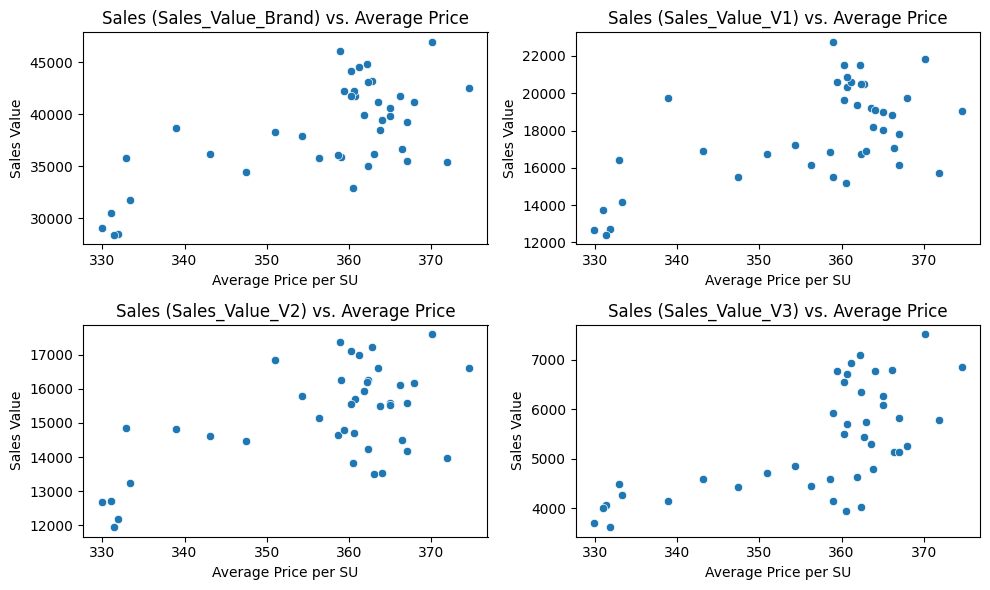

In [ ]:
# Scatter plot for sales vs. average price
plt.figure(figsize=(10, 6))
for i, col in enumerate(sales_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=merged_sales_media_data['Avg_Price_per_SU'], y=merged_sales_media_data[col])
    plt.title(f'Sales ({col}) vs. Average Price')
    plt.xlabel('Average Price per SU')
    plt.ylabel('Sales Value')
plt.tight_layout()
plt.show()

**<h2>viii) Correlation Analysis and Heatmap**

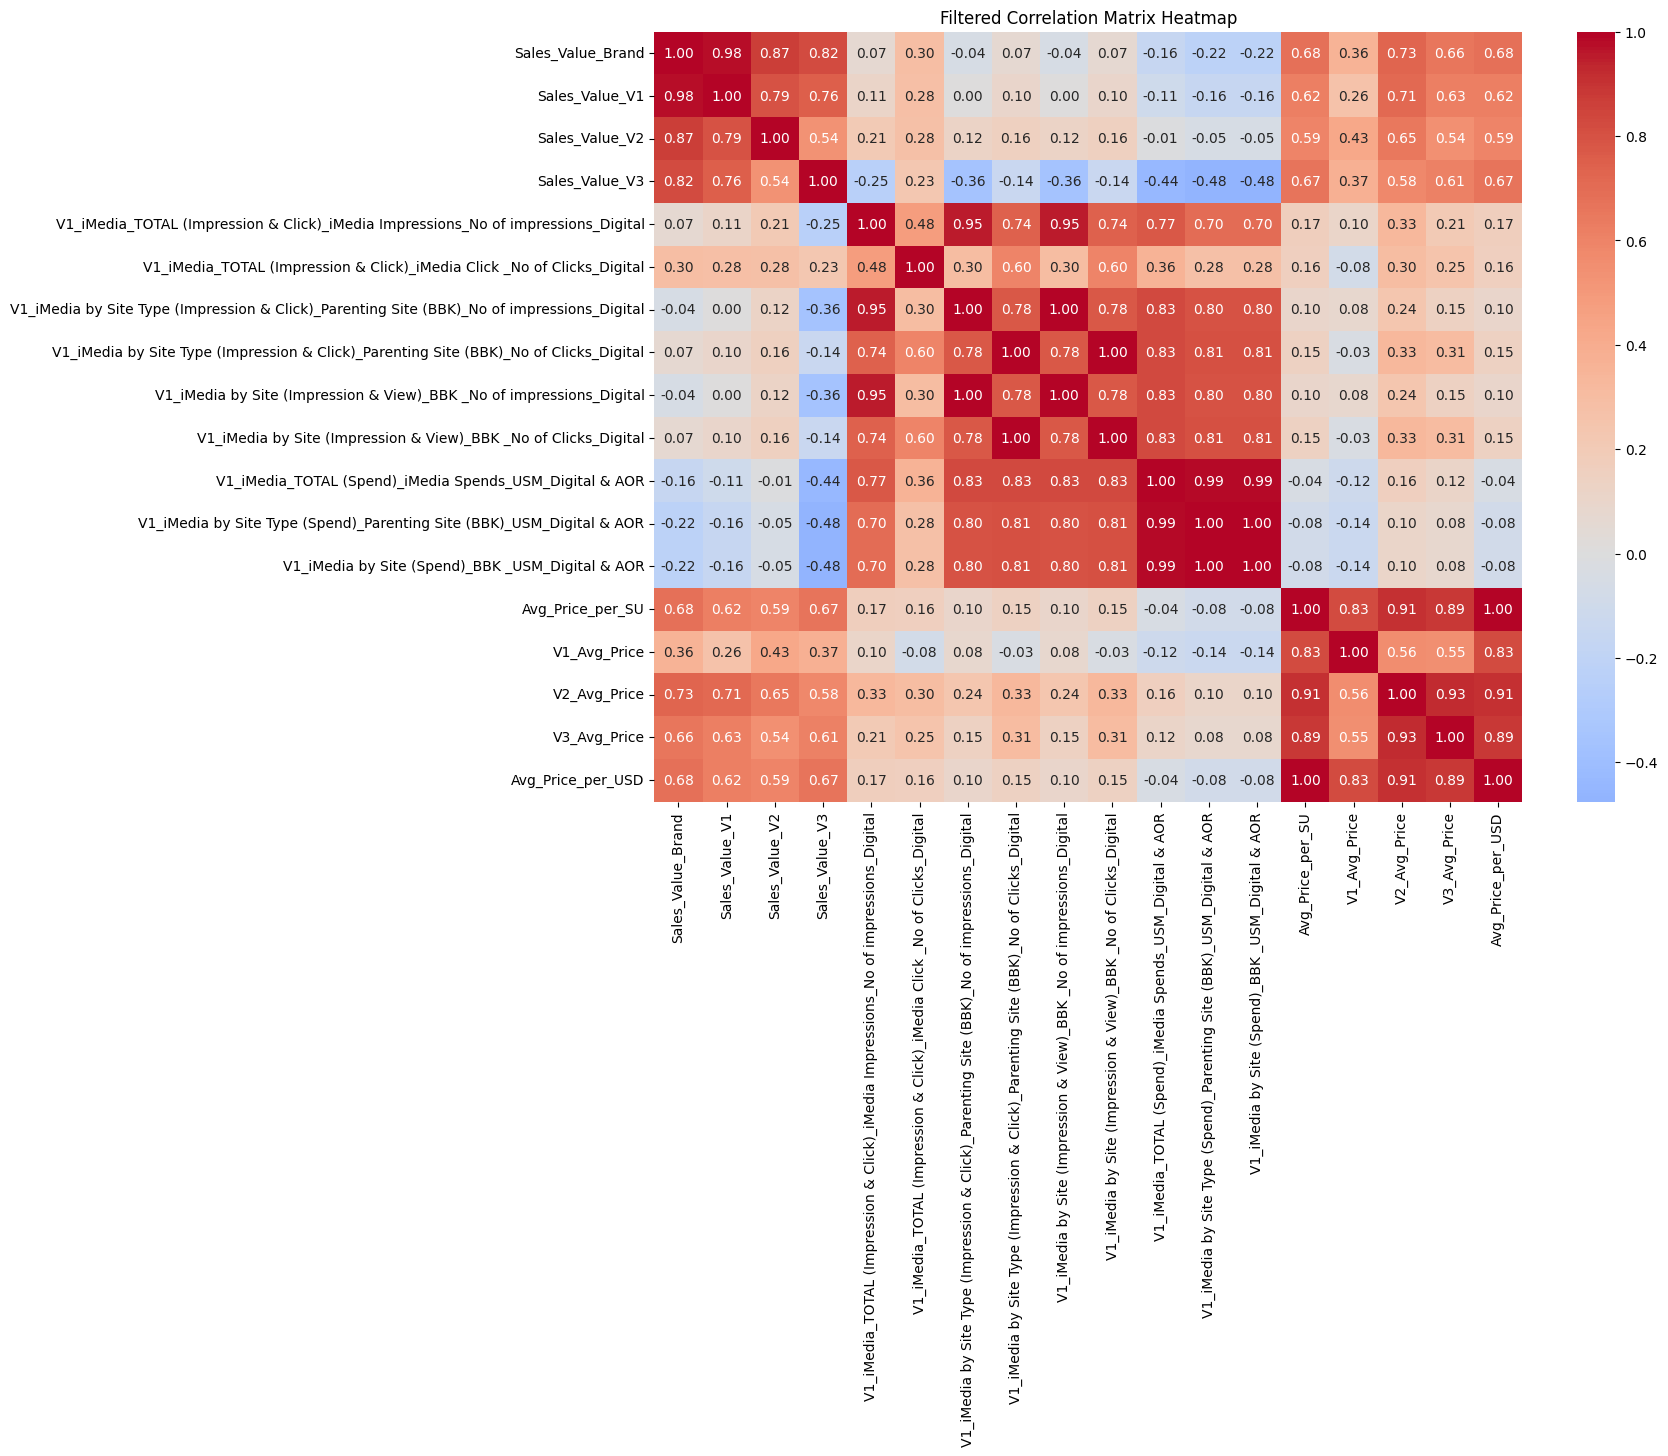

In [ ]:
# Filter columns for correlation matrix
relevant_columns = sales_columns + media_columns + price_columns
filtered_data = merged_sales_media_data[relevant_columns]

# Compute and plot correlation matrix for filtered columns
filtered_corr_matrix = filtered_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Filtered Correlation Matrix Heatmap")
plt.show()

**<h2>ix) Distribution and Density Plots**

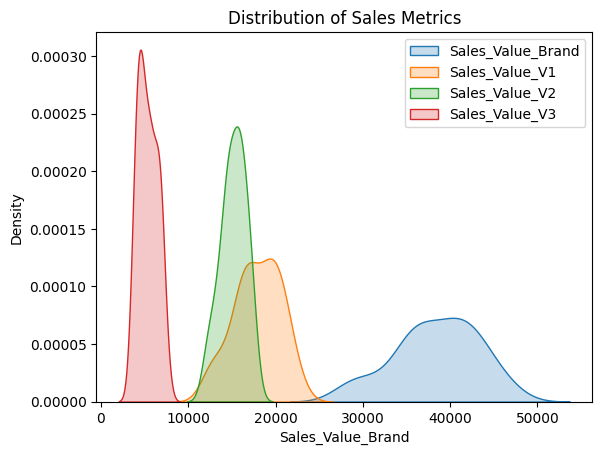

In [ ]:
#Visualize the distribution of each metric to understand data skewness, variance, or potential bimodality.
sales_columns = ['Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2', 'Sales_Value_V3']
for col in sales_columns:
    sns.kdeplot(merged_sales_media_data[col], label=col, fill=True)
plt.title("Distribution of Sales Metrics")
plt.legend()
plt.show()

**<h1>x) Sales and Average Price by Month**


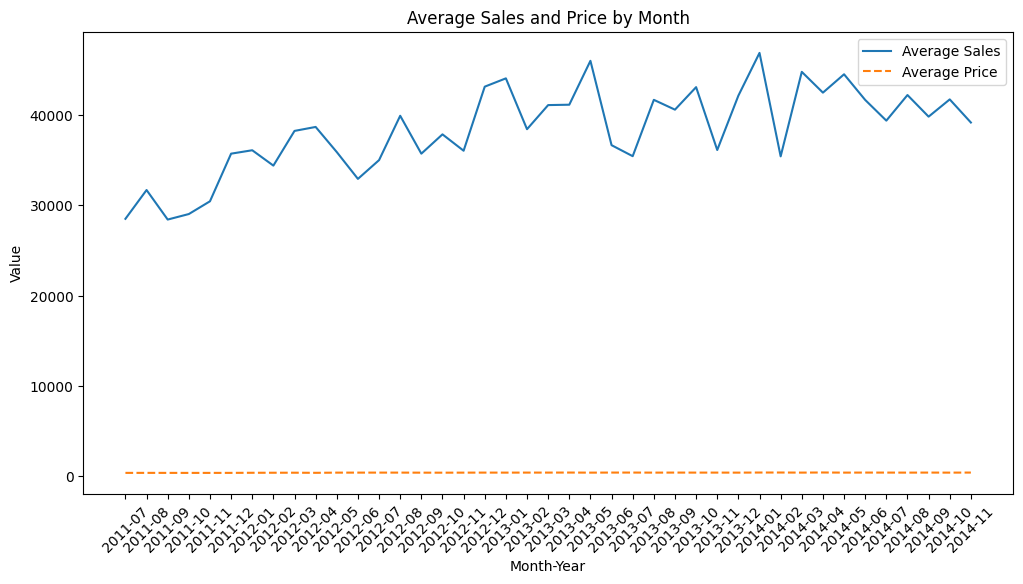

In [ ]:
# Convert 'Period' to datetime and extract month-year
merged_sales_media_data['Period'] = pd.to_datetime(merged_sales_media_data['Period'])
merged_sales_media_data['Month_Year'] = merged_sales_media_data['Period'].dt.to_period('M')

# Group by month-year and calculate average sales and price
monthly_avg = merged_sales_media_data.groupby('Month_Year').agg({
    'Sales_Value_Brand': 'mean',
    'Avg_Price_per_SU': 'mean'
}).reset_index()

# Plot average sales and average price by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Month_Year'].astype(str), monthly_avg['Sales_Value_Brand'], label='Average Sales')
plt.plot(monthly_avg['Month_Year'].astype(str), monthly_avg['Avg_Price_per_SU'], label='Average Price', linestyle='--')

plt.xlabel('Month-Year')
plt.ylabel('Value')
plt.title('Average Sales and Price by Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**<h1>xi) Monthly Total Sales with Highlighted Peak Month**

Highest Sales Month: 2014-01 with Sales: 46926.17


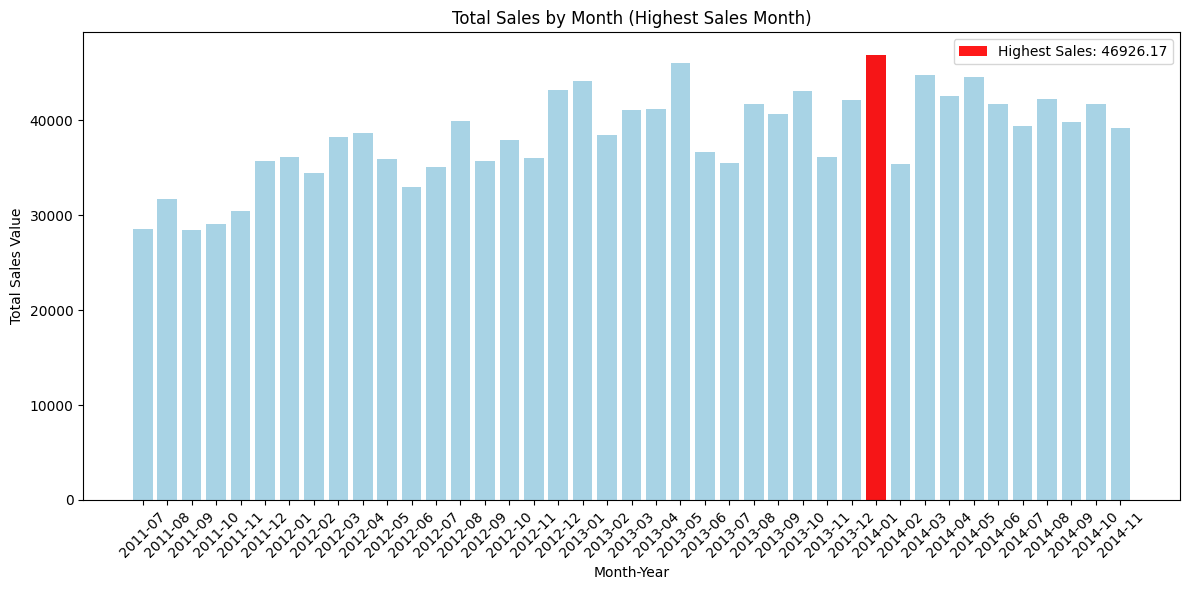

In [ ]:
# Convert 'Period' to datetime and extract month-year
merged_sales_media_data['Period'] = pd.to_datetime(merged_sales_media_data['Period'])
merged_sales_media_data['Month_Year'] = merged_sales_media_data['Period'].dt.to_period('M')

# Group by month-year and calculate total sales and average price
monthly_data = merged_sales_media_data.groupby('Month_Year').agg({
    'Sales_Value_Brand': 'sum',  # Total sales for each month
    'Avg_Price_per_SU': 'mean'  # Average price for each month
}).reset_index()

# Convert 'Month_Year' to string for plotting
monthly_data['Month_Year'] = monthly_data['Month_Year'].astype(str)

# Identify the month with the highest sales
highest_sales_month = monthly_data.loc[monthly_data['Sales_Value_Brand'].idxmax()]
highest_month = highest_sales_month['Month_Year']
highest_sales = highest_sales_month['Sales_Value_Brand']

print(f"Highest Sales Month: {highest_month} with Sales: {highest_sales}")

# Plot total sales by month, highlighting the highest sales month
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='Month_Year', y='Sales_Value_Brand', color='skyblue', alpha=0.8)
plt.bar(
    highest_month,
    highest_sales,
    color='red',
    label=f'Highest Sales: {highest_sales:.2f}',
    alpha=0.9
)

# Add labels and titles
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.title('Total Sales by Month (Highest Sales Month)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**<h1>xii) Pie Chart for Distribution of Sales by Category**

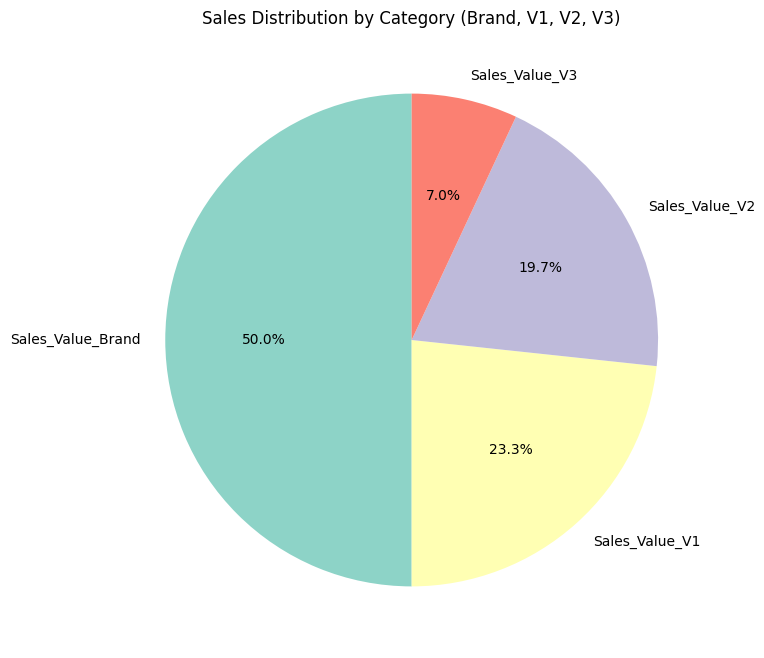

In [ ]:
# Pie chart for sales distribution across Brand, V1, V2, V3
sales_sum = merged_sales_media_data[sales_columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_sum, labels=sales_columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", n_colors=4))
plt.title('Sales Distribution by Category (Brand, V1, V2, V3)')
plt.show()

In [ ]:
# Display the list of column names in the merged_sales_media_data DataFrame
list_of_columns = merged_sales_media_data.columns.tolist()
print(list_of_columns)

['Period', 'Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2', 'Sales_Value_V3', 'Volume_Brand', 'V1_Volume', 'V2_Volume', 'V3_Volume', 'Avg_Price_per_SU', 'V1_Avg_Price', 'V2_Avg_Price', 'V3_Avg_Price', 'Avg_Price_per_USD', 'V1_USD', 'V2_USD', 'V3_USD', 'WTD_Brand', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'NUMD_Brand', 'V1_NUMD', 'V2_NUMD', 'V3_NUMD', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment', 'V3_Shipment', 'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital', 'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital', 'Brand_Search  (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR', 'Brand_Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital', 'Brand_Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital', 'Brand_Birth Rate_No. of  Births_ppl_CPA', 'Brand_Youtube Brand Channel_Side by Side Video_No of Views_P&G/Digital Agency', 'Brand_CRM_Pampers Baby Club_Pls ad

In [ ]:
# Verify the original column names
print("Original columns:", merged_sales_media_data.columns.tolist())

# Ensure proper renaming of columns
renamed_columns = {
    'Sales_Value_Brand': 'Brand_Sales_Value',
    'Volume_Brand': 'Brand_Volume',
    'Avg_Price_per_SU': 'Brand_Avg_Price_per_SU',
    'Avg_Price_per_USD': 'Brand_Avg_Price_per_USD',
    'WTD_Brand': 'Brand_WTD',
    'NUMD_Brand': 'Brand_NUMD',
    'Brand_Shipment': 'Brand_Shipment_Value',
    'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital': 'Brand_Search_Impressions_Yahoo',
    'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital': 'Brand_Search_Clicks_Yahoo',
    'Brand_Search  (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR': 'Brand_Search_Spends_Yahoo',
    'Brand_Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital': 'Brand_Facebook_Likes',
    'Brand_Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital': 'Brand_Facebook_PTAT',
    'Brand_Birth Rate_No. of  Births_ppl_CPA': 'Brand_Birth_Rate',
    'Brand_Youtube Brand Channel_Side by Side Video_No of Views_P&G/Digital Agency': 'Brand_Youtube_Views',
    'Brand_CRM_Pampers Baby Club_Pls add all CRM Elements_Pls add all CRM Elements_P&G': 'Brand_CRM_Engagement'
}

# Apply renaming
merged_sales_media_data.rename(columns=renamed_columns, inplace=True)

# Confirm renaming
print("Renamed columns:", merged_sales_media_data.columns.tolist())

# Filter the DataFrame to keep only relevant columns
brand_features = [
    'Brand_Sales_Value', 'Brand_Volume', 'Brand_Avg_Price_per_SU',
    'Brand_Avg_Price_per_USD', 'Brand_WTD', 'Brand_NUMD', 'Brand_Shipment_Value',
    'Brand_Search_Impressions_Yahoo', 'Brand_Search_Clicks_Yahoo',
    'Brand_Search_Spends_Yahoo', 'Brand_Facebook_Likes', 'Brand_Facebook_PTAT',
    'Brand_Birth_Rate', 'Brand_Youtube_Views', 'Brand_CRM_Engagement'
]

# Add 'Period' column for time reference
brand_data = merged_sales_media_data[['Period'] + brand_features].dropna()

# Confirm filtered data
print(brand_data.head())

Original columns: ['Period', 'Sales_Value_Brand', 'Sales_Value_V1', 'Sales_Value_V2', 'Sales_Value_V3', 'Volume_Brand', 'V1_Volume', 'V2_Volume', 'V3_Volume', 'Avg_Price_per_SU', 'V1_Avg_Price', 'V2_Avg_Price', 'V3_Avg_Price', 'Avg_Price_per_USD', 'V1_USD', 'V2_USD', 'V3_USD', 'WTD_Brand', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'NUMD_Brand', 'V1_NUMD', 'V2_NUMD', 'V3_NUMD', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment', 'V3_Shipment', 'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital', 'Brand_Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital', 'Brand_Search  (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR', 'Brand_Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital', 'Brand_Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital', 'Brand_Birth Rate_No. of  Births_ppl_CPA', 'Brand_Youtube Brand Channel_Side by Side Video_No of Views_P&G/Digital Agency', 'Brand_CRM_Pamper

In [ ]:
# Independent variables (X) and dependent variable (Y)
X = merged_sales_media_data[['Brand_Avg_Price_per_SU','Brand_Shipment_Value','Brand_Search_Clicks_Yahoo']]  # Adjusted column names
y = merged_sales_media_data['Brand_Sales_Value']

# Split data into train and test (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R^2
r2 = r2_score(y_test, y_pred)
# Adjusted R^2
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"Adjusted R^2: {adj_r2}")
print(f"MAPE: {mape}")


RMSE: 2752.0280753697675
R^2: 0.3855339992932909
Adjusted R^2: 0.01685439886926543
MAPE: 0.060895767185013217
